In [1]:
random_state = 2018
rs = 2018
import sklearn
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

import matplotlib.image as mpimg
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import modules as m

from functools import reduce
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%config IPCompleter.greedy=True # load functionality for autocompletion
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

ModuleNotFoundError: No module named 'modules'

In [3]:
cd /Users/decio/thesis/csi_thesis

/Users/decio/thesis/csi_thesis


In [109]:
# load in dictionary objects for both datasets

In [115]:
??open

In [4]:
# Change blindness
with open('file.txt', 'rb') as handle:
    lop = pickle.loads(handle.read())

In [5]:
# Crime scene inspection
with open('csi.txt', 'rb') as handle:
    csi = pickle.loads(handle.read())

In [43]:
emp_lop = {}

for i in lop:
    if i == 4:
        pass
    else:
        a,b = score_knn_cv(standard_to_pca(lop[i]),3)
        im = i
        emp_lop[i] = pd.DataFrame({'Train':[np.mean(a)],'Test':b['macro avg']['f1-score'], 'image': [i]})

/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/

In [90]:
emp_lop2 = pd.concat(emp_lop)

In [91]:
emp_lop2.columns.values

array(['Test', 'Train', 'image'], dtype=object)

In [92]:
#create dictionary
emp_dict = m.create_dict(emp_lop2,'image')

In [93]:
#melt dataframes into plottable df
for i in emp_dict:
    emp_dict[i] = plottable_df(emp_dict[i], 'image',i)

#create saveable df    
cd = pd.concat(emp_dict).reset_index().drop(['level_0','level_1','index'],axis = 1)
cd.columns = ['fase', 'score', 'image']

In [271]:
cd = cd[cd.fase != 'image'] # take out the image rows

In [272]:
cd.to_csv('cdknn.csv')

In [7]:
pd.read_csv('cdknn.csv').drop(['Unnamed: 0'], axis = 1)

,fase,score,image
0,Test,0.285714,1
1,Train,0.000000,1
2,Test,0.583333,2
3,Train,0.400000,2
4,Test,0.416667,3
5,Train,0.444444,3
6,Test,0.485714,5
7,Train,0.638889,5
8,Test,0.733333,6
9,Train,0.000000,6


In [126]:
csi_lop = {}

for i in csi:
    if i == 4:
        pass
    else:
        a,b = score_knn_cv(standard_to_pca(csi[i]),3)
        im = i
        csi_lop[i] = pd.DataFrame({'Train':[np.mean(a)],'Test':b['macro avg']['f1-score'], 'image': [i]})

/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/decio/anaconda3/lib/python3.6/

In [256]:
csi_lop2 = pd.concat(csi_lop)

In [257]:
csi_lop2 = csi_lop2.reset_index().drop(['level_0', 'level_1'], axis = 1)

In [258]:
kl = pd.DataFrame({'img':['11','12','31','21','22','32']})

In [259]:
csi_lop2['image'] = kl

In [260]:
csi = csi_lop2

In [285]:
csi2 = m.create_dict(csi,'image')

In [286]:
for i in csi2:
    csi2[i] = plottable_df(csi2[i], 'image', i)
    

In [288]:
pd.concat(csi2)

index variable     value image
11 0      0     Test  0.485714    11
   1      1    Train  0.355556    11
   2      2    image        11    11
12 0      0     Test  0.142857    12
   1      1    Train  0.722222    12
   2      2    image        12    12
21 0      0     Test  0.142857    21
   1      1    Train         0    21
   2      2    image        21    21
22 0      0     Test  0.142857    22
   1      1    Train  0.388889    22
   2      2    image        22    22
31 0      0     Test  0.485714    31
   1      1    Train         0    31
   2      2    image        31    31
32 0      0     Test  0.142857    32
   1      1    Train  0.355556    32
   2      2    image        32    32

In [289]:
csi2 = pd.concat(csi2)
csi2 = csi2.reset_index().drop(['level_0', 'level_1', 'index'], axis = 1)
csi2.columns = ['fase','score','image']
csi2 = csi2[csi2.fase != 'image'] #take out the good rows

In [298]:
csi2.to_csv('csiknn.csv')

In [8]:
pd.read_csv('csiknn.csv').drop(['Unnamed: 0'], axis = 1)

,fase,score,image
0,Test,0.485714,11
1,Train,0.355556,11
2,Test,0.142857,12
3,Train,0.722222,12
4,Test,0.142857,21
5,Train,0.000000,21
6,Test,0.142857,22
7,Train,0.388889,22
8,Test,0.485714,31
9,Train,0.000000,31


In [242]:
def plottable_df(df, col, i):
    test = df[df[col] == i]
    test2 = pd.melt(test)
    test3 = test2.iloc[:3,]
    test4 = pd.concat([test3,pd.DataFrame({'image': [i,i,i]})], axis =1).reset_index()
    return test4

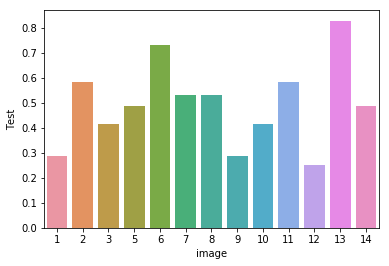

In [53]:
sns.barplot(x = pd.concat(emp_lop).image, y = pd.concat(emp_lop).Test)
plt.show()

In [18]:
test.groupby(['experience']).count()

,relevant_fixdur,redundant_fixdur,relevant_fixnum,redundant_fixnum
experience,,,,
1.0,7,7,7,7
2.0,8,8,8,8


In [25]:
a, b = score_knn_cv(standard_to_pca(test),3)

/Users/decio/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,Test,Train,image
0,0.583333,0.7,3


In [8]:
def standard_to_pca(df):
    #Standardscale the data
    st = StandardScaler()
    st.fit(df.iloc[:,:4])
    df2 = st.transform(df.iloc[:,:4])

    #Convert into 3 PCAs
    pca = PCA(3) #standard
    pc_std = pca.fit_transform(df) #standard
    
    columns = ['pca1', 'pca2', 'pca3']
    change_std = pd.concat([pd.DataFrame(pc_std, 
                                         columns = columns), df[['experience']]], axis = 1)
    
    return change_std
    
    

In [37]:
def standardize(df):
    st = StandardScaler
    st.fit(df.iloc[:,:4])
    scaled_df = st.transform(df.iloc[:,:4])
    return scaled_df


In [39]:
#Set the var_explained counter
var_exp = np.linspace(1,95,19)
var_exp = [int(i)/100 for i in var_exp]

# How much PCA's do we need?
# Apparentely we need 4 to capture a lot of variance


    pca2 = PCA(i) #standard
    pc_std = pca2.fit_transform(b) #standard
    
    scree_plot[i] = {'explained_std':sum(pca2.explained_variance_ratio_) ,
                     'pca_std' : pc_std.shape[1],
                    }

In [40]:
pd.DataFrame.from_dict(scree_plot, orient = 'index')

,explained_std,pca_std
0.01,0.448001,1
0.06,0.448001,1
0.11,0.448001,1
0.16,0.448001,1
0.21,0.448001,1
0.27,0.448001,1
0.32,0.448001,1
0.37,0.448001,1
0.42,0.448001,1
0.48,0.704353,2


In [ ]:
def output(a,b,c,d,e,i):
    import pandas as pd
    output = pd.DataFrame({
                'image': [i],
               'extratrees_model_best': a.best_score_, 
              'forest_model_best': b.best_score_, 
              'f1_score_extra': [pd.DataFrame.from_dict(c['weighted avg'],
                                                       'index').loc['f1-score'].values[0]],
              'f1_score_forest': [pd.DataFrame.from_dict(d['weighted avg'], 
                                                       'index').loc['f1-score'].values[0]], 
              'important_feature':[e.reset_index().nlargest(1,'importance').rename(columns = {'index':'feature'}).values[0,0]],
             'important_feature_value': [e.reset_index().nlargest(1,'importance').rename(columns = {'index':'feature'}).values[0,1]]})
    return output



In [42]:
def score_knn_cv(df,cols):
    
    from sklearn.metrics import classification_report
    
    labels = [1,2]
    target_names =['Novice', 'Expert']
    
    rs = 2018
    
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:cols],df.experience,test_size = 0.33, random_state = rs)     

    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
        
        #y_pred = knn.predict(X_test)
        
    score = cross_val_score(knn, X_train, y_train, cv = 3, scoring = 'f1')
    
    #Now predict
    y_pred = knn.predict(X_test)
    
    clf_rep = classification_report(y_test, y_pred, labels = labels,target_names = target_names, output_dict = True)
        
    return score, clf_rep
